# **Sehr simples ANN für die Iris-Daten**


---



# Bibliotheken einladen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Iris-Datensatz laden und vorbereiten

* **One-Hot Encoding**: kategorische Daten werden in eine One-Hot-Darstellung umgewandelt. Das bedeutet, dass jede Kategorie durch einen Binärvektor dargestellt wird, wobei nur ein Element 1 ist (für die entsprechende Klasse), alle anderen Elemente sind 0.

* **Standardscaler**: skaliert die Variablen auf Standardnormalverteilung (Mittelwert = 0, Breite Abhängig von Varianz)

In [2]:
# Iris-Datensatz laden
iris = load_iris()
X = iris['data']  # Merkmale
y = iris['target']  # Zielvariable (Klassen)

# Zielvariable in One-Hot-Encoding umwandeln
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Merkmale standardisieren
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neuronales Netz aufbauen
1. Eingabeschicht:
> Nimmt die 4 Merkmale (Sepal- und Petal-Länge/-Breite) des Iris-Datensatzes als Eingabe.

2. Versteckte Schichten:
> Enthalten 10 Neuronen mit der ReLU-Aktivierungsfunktion, die Nichtlinearitäten modelliert.

3. Ausgabeschicht:
> Enthält 3 Neuronen (eine für jede Klasse: Setosa, Versicolor, Virginica) mit der Softmax-Aktivierungsfunktion, die Wahrscheinlichkeiten für die Klassen berechnet.

In [3]:
model = Sequential([
    Input(shape=(4,)),                                             # Eingabeschicht für die 4 Merkmale
    Dense(10, activation='relu'),                                  # Versteckte Schicht mit 10 Neuronen
    Dense(3, activation='softmax')                                 # Ausgabeschicht mit 3 Klassen
])

# Modell kompilieren / Hyperparameter festlegen

* **optimizer**: Der Optimierungsalgorithmus, der die Gewichte des Modells aktualisiert. --> Adam - stabil und schnell,
* **loss**: Die Verlustfunktion, die misst, wie gut das Modell während des Trainings performt. --> categorical crossentropy - geeignet für Klassifizierung mit mehr als zwei Klassen
* **metrics**: Eine Liste von Metriken, die während des Trainings überwacht werden. --> accuracy.

In [4]:
model.compile(
    optimizer='adam',               # Optimierungsalgorithmus
    loss='categorical_crossentropy', # Verlustfunktion für Mehrklassenklassifikation
    metrics=['accuracy']            # Genauigkeit als Metrik
)

# Modell trainieren / Hyperparameter festlegen

* **Anzahl der Epochen**: In jeder Epoche sieht das Modell den gesamten Trainingsdatensatz mindestens einmal.
* **Validation_split**: Anteil der Trainingsdaten, der für die Validierung verwendet wird - hier 20%; Überwachung der Leistung auf Validierungsdaten (z. B. zur Erkennung von Overfitting).
* **Batch_size**: Die Batchgröße gibt an, wie viele Datenpunkte gleichzeitig durch das Modell verarbeitet werden, bevor ein Gewichtungsupdate erfolgt. Kleine Batchgrößen: Bessere Generalisierung, aber langsamer.
* **Verbose**: Fortschrittsanzeige, Info zum Verlauf der Epochen (mögliche Werte 0,1,2)

In [5]:
#y_train = tf.sparse.to_dense(y_train)

history = model.fit(
    X_train, y_train,
    epochs=50,                       # Anzahl der Epochen
    batch_size=10,                   # Batchgröße
    validation_split=0.2,            # Validierungsdaten (20 % der Trainingsdaten)
    verbose=1                        # Fortschrittsanzeige
)

Epoch 1/50
10/10 [==============================] - 1s 35ms/step - loss: 1.6386 - accuracy: 0.2708 - val_loss: 1.4983 - val_accuracy: 0.2083
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 1.5010 - accuracy: 0.2604 - val_loss: 1.4169 - val_accuracy: 0.1250
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 1.3841 - accuracy: 0.2604 - val_loss: 1.3371 - val_accuracy: 0.1250
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 1.2734 - accuracy: 0.2500 - val_loss: 1.2653 - val_accuracy: 0.1250
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 1.1767 - accuracy: 0.3229 - val_loss: 1.2004 - val_accuracy: 0.2083
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 1.0924 - accuracy: 0.5000 - val_loss: 1.1432 - val_accuracy: 0.3750
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 1.0192 - accuracy: 0.5625 - val_loss: 1.0954 - val_accuracy: 0.4167
Epoch 8/50
10/10 [

# Modell bewerten

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testverlust: {loss:.4f}")
print(f"Testgenauigkeit: {accuracy:.4f}")

1/1 [==============================] - 0s 34ms/step - loss: 0.3885 - accuracy: 0.9000
Testverlust: 0.3885
Testgenauigkeit: 0.9000


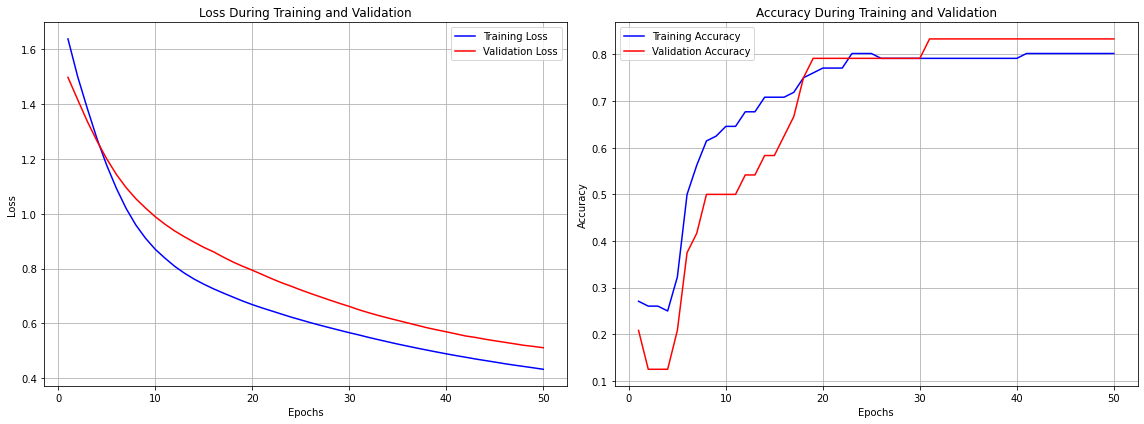

In [7]:
# Trainingshistorie aus dem Modell
history_dict = history.history

# Zugriff auf die Loss- und Accuracy-Werte
loss = history_dict['loss']             # Trainingsverlust
val_loss = history_dict['val_loss']     # Validierungsverlust
accuracy = history_dict['accuracy']     # Trainingsgenauigkeit
val_accuracy = history_dict['val_accuracy']  # Validierungsgenauigkeit

# Erstellen von zwei separaten Plots
epochs = range(1, len(loss) + 1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Loss
ax[0].plot(epochs, loss, 'b-', label='Training Loss')
ax[0].plot(epochs, val_loss, 'r-', label='Validation Loss')
ax[0].set_title('Loss During Training and Validation')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid()

# Subplot 2: Accuracy
ax[1].plot(epochs, accuracy, 'b-', label='Training Accuracy')
ax[1].plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax[1].set_title('Accuracy During Training and Validation')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid()

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

# Modell anwenden und Vorhersagen treffen

In [8]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Vorhergesagte Klassen
y_true_classes = np.argmax(y_test, axis=1)  # Tatsächliche Klassen

# Ergebnisse anzeigen
print("Vorhergesagte Klassen:", y_pred_classes)
print("Tatsächliche Klassen:", y_true_classes)

1/1 [==============================] - 0s 95ms/step
Vorhergesagte Klassen: [1 0 2 2 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Tatsächliche Klassen: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


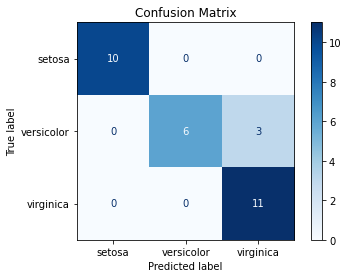

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Konfusionsmatrix berechnen
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Konfusionsmatrix visualisieren
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()